In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
def diagnostic_plot(X, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X,y)
    pred = rgr.predict(X)
    
    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [3]:
df = pd.read_csv('data/nicedf.csv')

In [4]:
df.year_released = 2021-df.year_released

In [5]:
df.rename(columns={'year_released':'age'},inplace=True)

In [6]:
X, y = df.iloc[:,2:], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7647879860492254

In [9]:
lr.score(X_val, y_val)

0.6382696600357274

In [10]:
train_preds = lr.predict(X_train)
total_preds = lr.predict(X)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
total_rmse = mean_squared_error(y, total_preds, squared = False)

train_mae = mean_absolute_error(y_train, train_preds)
total_mae = mean_absolute_error(y, total_preds)

print(f'train rme is {train_rmse}')
print(f'total rme is {total_rmse}')

print(f'train mae is {train_mae}')
print(f'total mae is {total_mae}')

train rme is 466887.84479545703
total rme is 507082.54959323345
train mae is 177085.42605772876
total mae is 180682.30554660654


In [11]:
df['saleXprice'] = df.been_sale * df.orig_price

In [12]:
cols = list(df.columns)
cols.insert(22, cols.pop(cols.index('saleXprice')))
df = df[cols]

In [13]:
# found columns that have all 0's

df.drop(columns=['FirstPerson_tag','TurnBased_tag','Coop_tag','_genre'],inplace=True)

In [14]:
log_list = ['num_reviews', 'positive', 'negative']

for things in log_list:
    df[things] = np.log(df[things])
    

In [17]:
for things in log_list:
    df.loc[df[things] == -inf,things] =0

In [ ]:
X, y = df.iloc[:,2:], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [19]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7647879860492254

In [20]:
lr.score(X_val, y_val)

0.6382696600357274

In [21]:
train_preds = lr.predict(X_train)
total_preds = lr.predict(X)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
total_rmse = mean_squared_error(y, total_preds, squared = False)

train_mae = mean_absolute_error(y_train, train_preds)
total_mae = mean_absolute_error(y, total_preds)

print(f'train rme is {train_rmse}')
print(f'total rme is {total_rmse}')

print(f'train mae is {train_mae}')
print(f'total mae is {total_mae}')

train rme is 466887.84479545703
total rme is 507082.54959323345
train mae is 177085.42605772876
total mae is 180682.30554660654


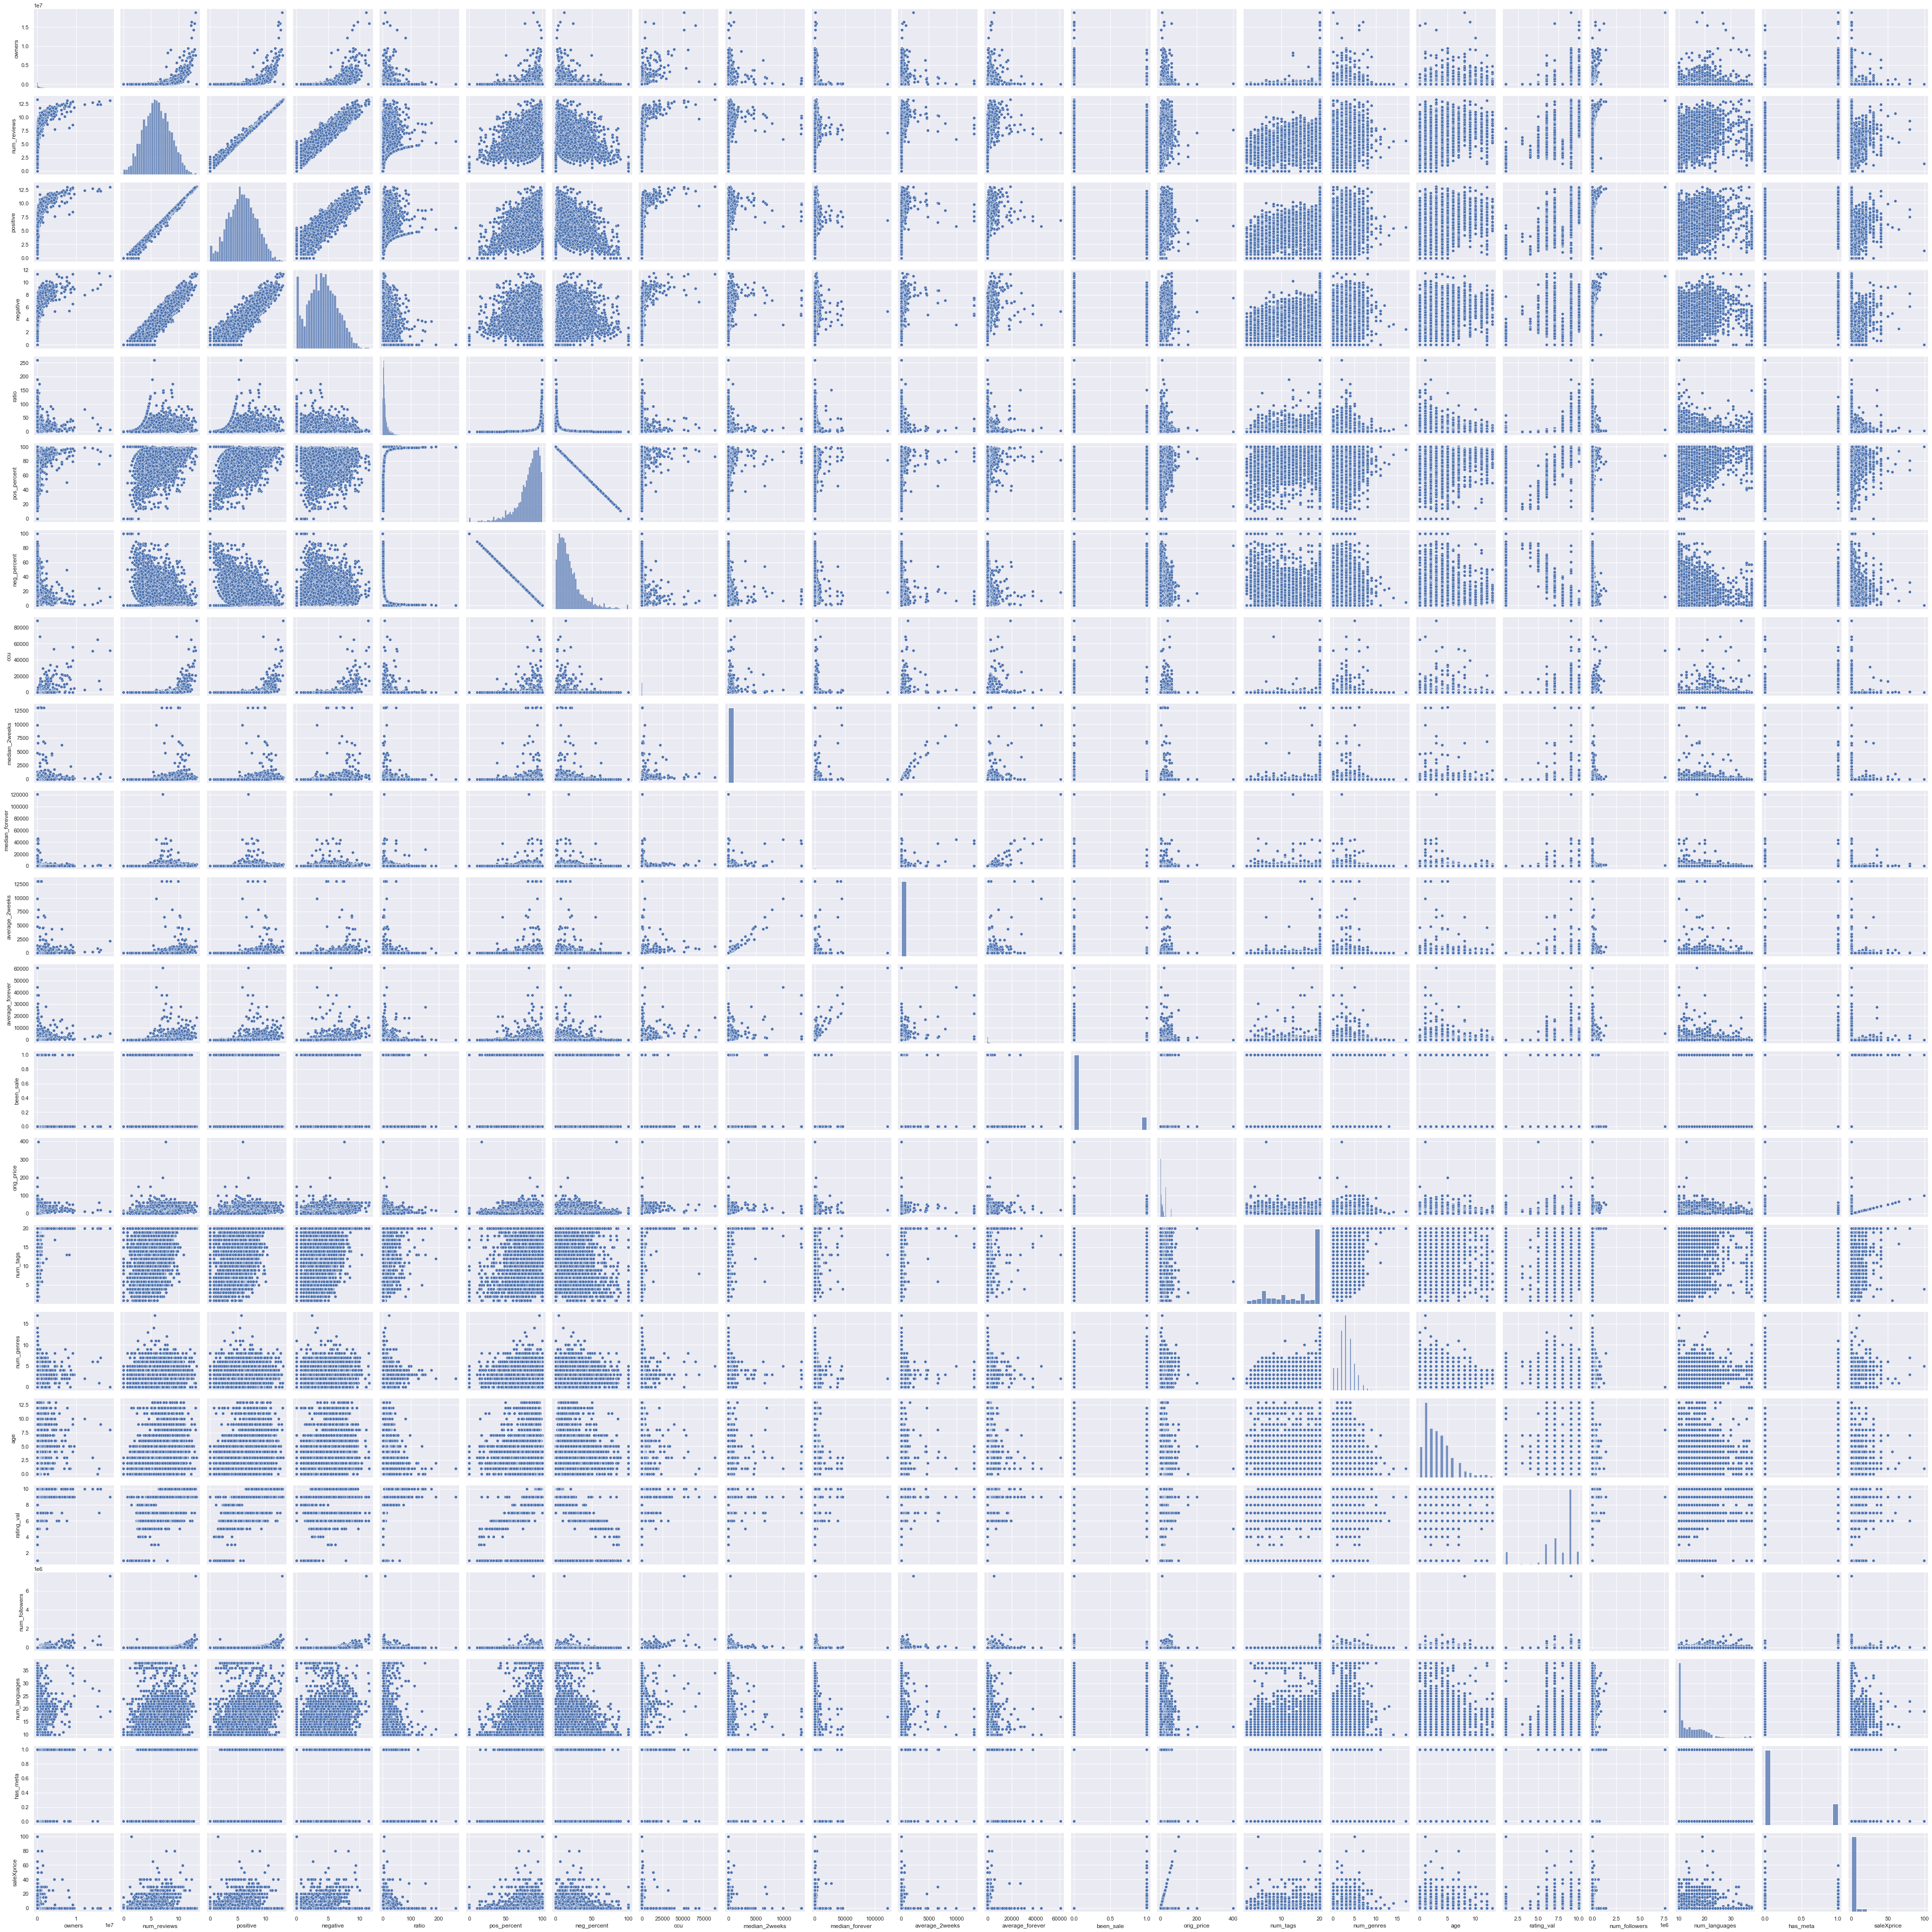

In [22]:
'''
So after transofrming the review columns logarithmically, they seem to have an exponenetial relationship to the target, which
is the oppoosite. clearly there is a relationship I am not capturing
'''

sns.pairplot(df.iloc[:,1:23])

# Trying with no transformations

but seeing if we can identify the outliers that are dragging the dataset

In [43]:
df = pd.read_csv('data/nicedf.csv')

In [45]:
df.owners.value_counts()

1000.0        True
2000.0        True
3000.0        True
4000.0        True
5000.0        True
             ...  
3948000.0    False
515000.0     False
552000.0     False
656000.0     False
1323000.0    False
Name: owners, Length: 973, dtype: bool

In [46]:
counts = df.owners.value_counts()

In [47]:
to_remove = counts[counts<10].index

In [48]:
to_remove

Float64Index([ 71000.00000000004, 117999.99999999993,  185000.0000000001,
                         77000.0,  94000.00000000006,           113000.0,
                        108000.0,  62000.00000000005, 126999.99999999994,
               114000.0000000001,
              ...
              2561000.0000000005,  963999.9999999999, 1355999.9999999995,
              2730999.9999999977, 2069999.9999999998, 3948000.0000000014,
              515000.00000000047,  551999.9999999997,  655999.9999999995,
              1323000.0000000002],
             dtype='float64', length=892)

In [49]:
df = df[~df.owners.isin(to_remove)]

In [50]:
df.shape

(3170, 98)

In [51]:
lr = LinearRegression()

In [52]:
X, y = df.iloc[:,2:], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [53]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5549847249943882

In [54]:
lr.score(X_val, y_val)

0.32186887242299067

In [58]:
train_preds = lr.predict(X_train)

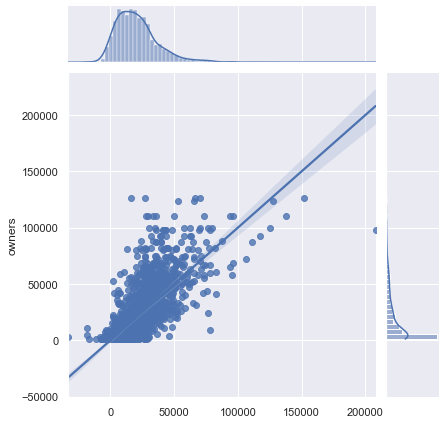

In [59]:
sns.jointplot(x = train_preds, y = y_train, kind = 'reg')

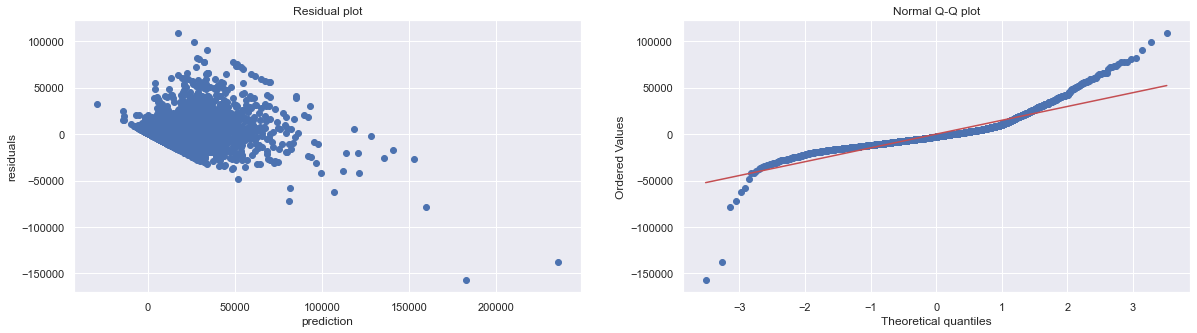

In [61]:
diagnostic_plot(X, y)

In [62]:
train_preds = lr.predict(X_train)
total_preds = lr.predict(X)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
total_rmse = mean_squared_error(y, total_preds, squared = False)

train_mae = mean_absolute_error(y_train, train_preds)
total_mae = mean_absolute_error(y, total_preds)

print(f'train rme is {train_rmse}')
print(f'total rme is {total_rmse}')

print(f'train mae is {train_mae}')
print(f'total mae is {total_mae}')

train rme is 16098.644394640833
total rme is 295832.54175304185
train mae is 11024.551103871683
total mae is 16269.887941069877
